# World Happiness Report Project

## Project Description


The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


## What is Dystopia?


Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.


## What are the residuals?


The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 


## What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?


The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.


## Dataset Link-


https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv
    


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Statistical Summary

In [4]:
df.shape

(158, 12)

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [60]:
df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### Top 10 countries with highest happiness score - Switzerland, Iceland, Denmark, Norway, Canada, Finland, Netherlands, Sweden, New Zeland and Australia. The top 10 countries are located mainly in Western Europe. 

In [61]:
df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


### 5 countries with lowest happiness score - Chad, Guinea, Ivory Coast, Burkina Faso, Afghanistan, Rwanda, Benin, Syria, Burundi, Togo. These countries are mainly located in Sub-Saharan Africa.

## Let's check the maximum value for each criteria (column) and which country belongs.

In [9]:
df[df['Economy (GDP per Capita)']==df['Economy (GDP per Capita)'].max()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
27,Qatar,Middle East and Northern Africa,28,6.611,0.06257,1.69042,1.0786,0.79733,0.6404,0.52208,0.32573,1.55674


In [10]:
df[df['Family']==df['Family'].max()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2.70201


In [11]:
df[df['Health (Life Expectancy)']==df['Health (Life Expectancy)'].max()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
23,Singapore,Southeastern Asia,24,6.798,0.0378,1.52186,1.02,1.02525,0.54252,0.4921,0.31105,1.88501


In [12]:
df[df['Freedom']==df['Freedom'].max()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
3,Norway,Western Europe,4,7.522,0.0388,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531


In [13]:
df[df['Trust (Government Corruption)']==df['Trust (Government Corruption)'].max()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.7737,0.42864,0.59201,0.55191,0.22628,0.67042


In [14]:
df[df['Generosity']==df['Generosity'].max()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
128,Myanmar,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805


### We have looked at each criteria and that're the countries with the highest values:

Economy (GDP per Capita - Qatar

Family - Iceland

Health (Life Expectancy) - Singapore

Freedom - Norway

Trust (Government Corruption) - Rwanda

Generosity - Myanmar

## Let's check the minimum value for each criteria (column) and which country belongs.

In [15]:
df[df['Economy (GDP per Capita)']==df['Economy (GDP per Capita)'].min()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


In [16]:
df[df['Family']==df['Family'].min()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223


In [17]:
df[df['Health (Life Expectancy)']==df['Health (Life Expectancy)'].min()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009


In [18]:
df[df['Freedom']==df['Freedom'].min()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [19]:
df[df['Trust (Government Corruption)']==df['Trust (Government Corruption)'].min()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


In [20]:
df[df['Generosity']==df['Generosity'].min()]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
101,Greece,Western Europe,102,4.857,0.05062,1.15406,0.92933,0.88213,0.07699,0.01397,0.0,1.80101


### We have looked at each criteria and that're the countries with the lowest values:

Economy (GDP per Capita - Congo (Kinshasa)

Family - Central African Republic

Health (Life Expectancy) - Sierra Leone

Freedom - Iraq

Trust (Government Corruption) - Indonesia

Generosity - Greece

# Exploratory Data Analysis EDA

In [21]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

## Checking for Null Values

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [23]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

### There is no null values present in the dataset.

<Axes: >

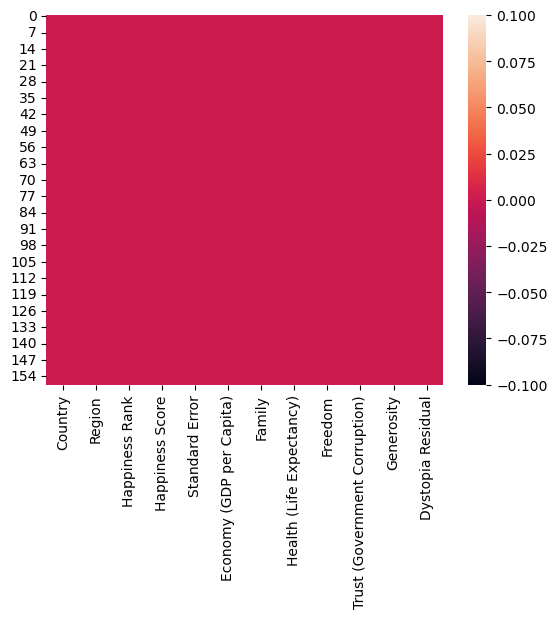

In [24]:
#We can also use heatmap to visualize if there is any null values presented

sns.heatmap(df.isnull())

## For simplicity we make a new dataframe, where only the numerical data will be included as only the numerical data is used to predict the happiness score. 

In [25]:
df_new = df[df.columns[3:]]
df_new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [26]:
df_new.describe()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Distribution of Skewness

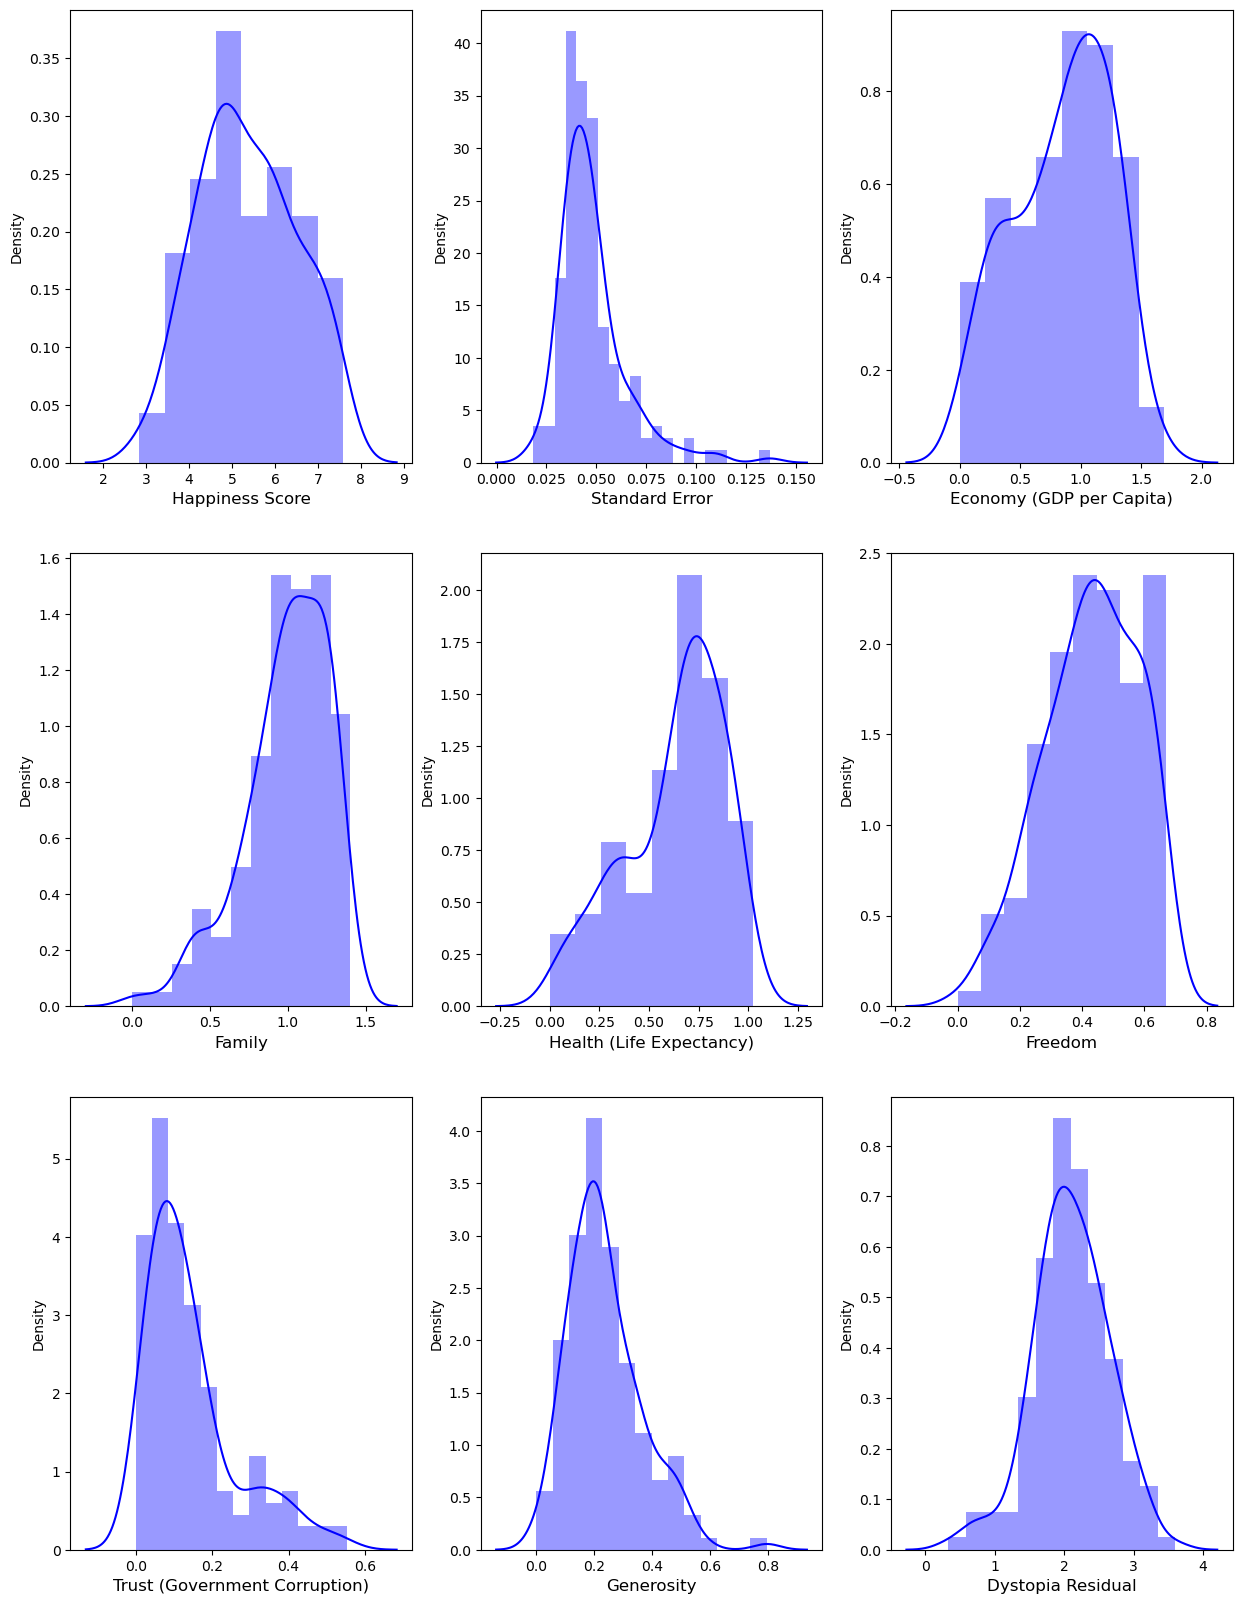

In [27]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber =1
for col in df_new:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[col], color='b')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [28]:
df_new.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Observation:
    
1. There is some skewness presented in the dataset.
2. Standard Error, Trust and Generosity have right skewed distribution.
3. Family has left skewed distribution.
4. There is no null values in the dataset.

### Removing the skewness

In [29]:
df_new['Standard Error']=np.cbrt(df['Standard Error'])
df_new['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])

In [30]:
df_new.skew()

Happiness Score                  0.097769
Standard Error                   0.979748
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Skewness has been reduced in Standard Error and Trust columns.

## Checking the correlation

In [34]:
df_new.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.201754,0.780966,0.740605,0.724200,0.568211,0.326229,0.180319,0.530474
Standard Error,-0.201754,1.000000,-0.224064,-0.132005,-0.321062,-0.159027,-0.158530,-0.112492,0.063299
Economy (GDP per Capita),0.780966,-0.224064,1.000000,0.645299,0.816478,0.370300,0.205482,-0.010465,0.040059
Family,0.740605,-0.132005,0.645299,1.000000,0.531104,0.441518,0.131653,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.321062,0.816478,0.531104,1.000000,0.360477,0.149556,0.108335,0.018979
Freedom,0.568211,-0.159027,0.370300,0.441518,0.360477,1.000000,0.461105,0.373916,0.062783
Trust (Government Corruption),0.326229,-0.158530,0.205482,0.131653,0.149556,0.461105,1.000000,0.238464,0.010769
Generosity,0.180319,-0.112492,-0.010465,0.087513,0.108335,0.373916,0.238464,1.000000,-0.101301
Dystopia Residual,0.530474,0.063299,0.040059,0.148117,0.018979,0.062783,0.010769,-0.101301,1.000000


<Axes: >

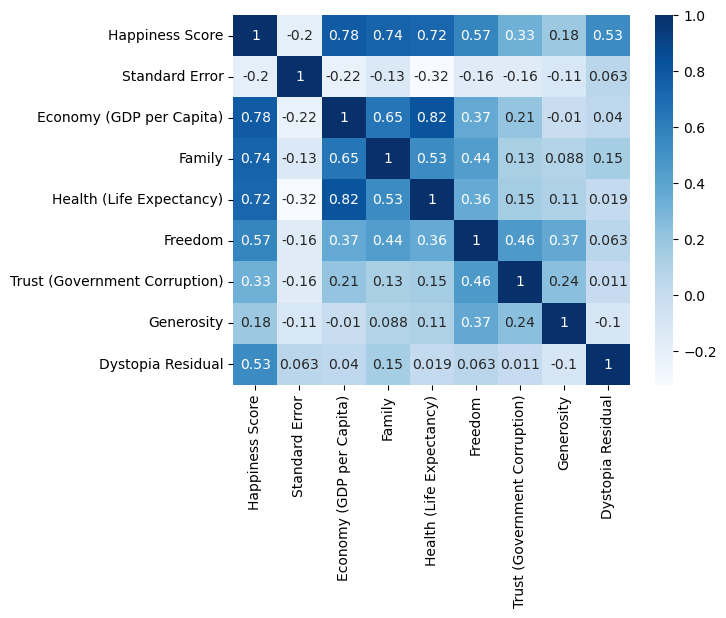

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(), annot = True, cmap = 'Blues')

Criteria like Economy, Family and Health are highly correlated towards the Happiness score. 

## Checking for outliers

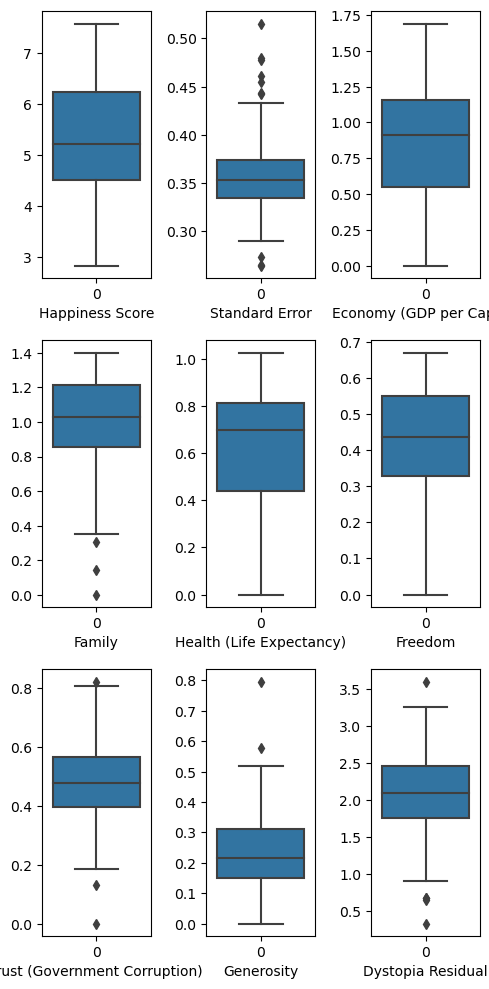

In [33]:
plt.figure(figsize=(5,10), facecolor='white')
plotnumber =1
for col in df_new:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df_new[col]) 
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Outliers are presented.

# Data Visualization

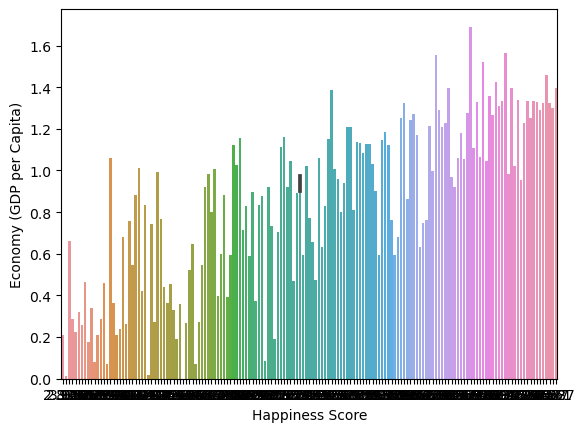

In [48]:
ax=sns.barplot(x ='Happiness Score', y = 'Economy (GDP per Capita)', data=df_new)
plt.show()

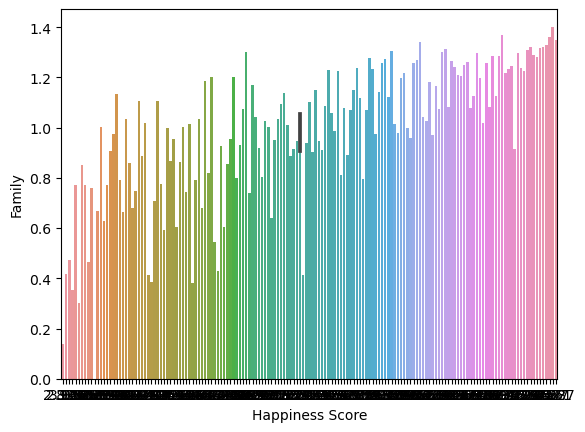

In [49]:
ax=sns.barplot(x ='Happiness Score', y = 'Family', data=df_new)
plt.show()

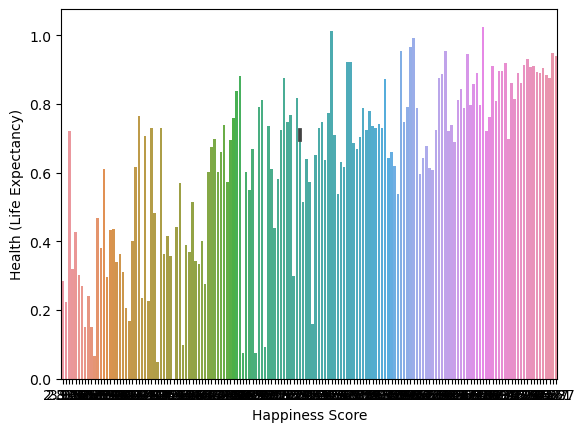

In [50]:
ax=sns.barplot(x ='Happiness Score', y = 'Health (Life Expectancy)', data=df_new)
plt.show()

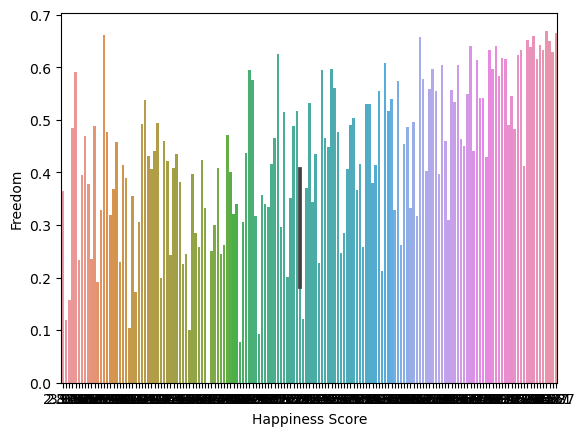

In [51]:
ax=sns.barplot(x ='Happiness Score', y = 'Freedom', data=df_new)
plt.show()

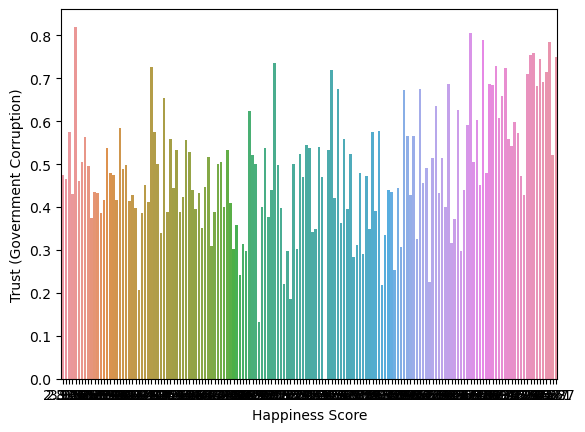

In [52]:
ax=sns.barplot(x ='Happiness Score', y = 'Trust (Government Corruption)', data=df_new)
plt.show()

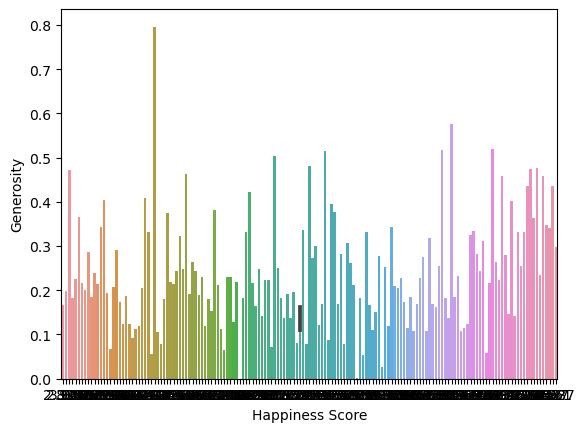

In [53]:
ax=sns.barplot(x ='Happiness Score', y = 'Generosity', data=df_new)
plt.show()

The Happyness Score increases with the increase of any of the criteria.

## Removing the outliers

In [54]:
from scipy.stats import zscore

z=np.abs(zscore(df_new))
z

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.937360,0.892612,1.369621,1.320281,1.263408,1.577438,1.826993,0.471040,0.758258
1,1.914581,0.172283,1.135226,1.514458,1.289434,1.332456,0.260958,1.575856,1.092857
2,1.884792,0.961125,1.192861,1.361054,0.992229,1.469659,2.075620,0.824293,0.712335
3,1.880411,0.524996,1.525130,1.251922,1.035145,1.605131,1.592625,0.868638,0.663893
4,1.797179,0.777930,1.194876,1.221204,1.118054,1.360416,1.428028,1.748563,0.639337
...,...,...,...,...,...,...,...,...,...
153,1.674055,0.849442,1.552987,0.800520,0.818610,1.087740,2.318782,0.087228,2.588925
154,1.783571,0.696643,1.392303,2.346860,1.263362,0.372033,0.357762,0.433117,0.843967
155,2.076199,0.255966,0.455245,1.901086,0.372199,1.809238,0.624780,1.856891,3.208430
156,2.164688,2.157804,2.067566,2.118467,1.649648,2.064472,0.123602,0.316950,0.481985


In [55]:
threshold=3
print(np.where(z>3))

(array([ 40,  64,  73, 115, 128, 147, 155, 157], dtype=int64), array([1, 1, 6, 1, 7, 3, 8, 3], dtype=int64))


In [56]:
df1=df_new[(z<3).all(axis=1)]
df1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738
1,7.561,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201
2,7.527,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.34139,2.49204
3,7.522,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531
4,7.427,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
151,3.587,0.350990,0.25812,0.85188,0.27125,0.39493,0.504388,0.21747,1.46494
152,3.575,0.313597,0.31982,0.30285,0.30335,0.23414,0.459770,0.36510,1.95210
153,3.465,0.325981,0.22208,0.77370,0.42864,0.59201,0.820269,0.22628,0.67042
154,3.340,0.331896,0.28665,0.35386,0.31910,0.48450,0.431066,0.18260,1.63328


8 rows have been removed as an outliers.

## Checking Variance Inflation Factor VIF

In [114]:
x=df1.drop('Happiness Score', axis=1)
y=df1['Happiness Score']

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features']=x.columns

vif

,VIF values,Features
0,26.770863,Standard Error
1,22.324320,Economy (GDP per Capita)
2,32.031361,Family
3,23.497832,Health (Life Expectancy)
4,17.867667,Freedom
5,18.197482,Trust (Government Corruption)
6,6.424451,Generosity
7,16.209592,Dystopia Residual


# Machine Learning

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Creating train test split

In [63]:
x=df1.drop('Happiness Score', axis=1)
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.29678,2.51738
1,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.43630,2.70201
2,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.34139,2.49204
3,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.34699,2.46531
4,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.45811,2.45176


In [65]:
y=y=df1['Happiness Score']
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=10)

In [67]:
x_train.shape

(105, 8)

In [68]:
y_train.shape

(105,)

In [69]:
x_test.shape

(45, 8)

In [70]:
y_test.shape

(45,)

## Linear Regression

In [71]:
lr=LinearRegression()

In [72]:
lr.fit(x_train,y_train)

LinearRegression()

In [73]:
lr.score(x_train, y_train)

0.998970310312031

99.90% 

In [74]:
#Predicted Values
lrpred=lr.predict(x_test)
lrpred

array([4.98350567, 4.60629845, 7.30748057, 4.9821229 , 5.89653666,
       5.72564239, 5.36878247, 5.53172876, 6.29027175, 5.8478904 ,
       5.58364133, 3.64841955, 5.86110642, 7.60927694, 6.86260748,
       4.57733126, 5.12774434, 6.31695325, 6.83643646, 6.36205299,
       4.80388317, 4.00229083, 4.32335728, 6.81302271, 5.792617  ,
       7.43411347, 4.88513492, 4.95396641, 5.242077  , 4.51644011,
       5.79943159, 4.82088986, 4.21405538, 4.53101965, 3.58539118,
       5.96159939, 4.24574791, 4.42155305, 4.49378582, 3.6894122 ,
       6.70985425, 5.99220414, 5.8136855 , 6.13967794, 5.832053  ])

In [75]:
#Actial Values
y_test

90     5.057
114    4.610
10     7.278
94     4.959
50     5.890
61     5.759
75     5.332
69     5.548
39     6.269
56     5.828
68     5.589
148    3.667
54     5.848
1      7.561
19     6.901
116    4.565
88     5.098
38     6.295
21     6.853
35     6.329
105    4.786
137    3.995
131    4.271
24     6.786
62     5.754
2      7.527
98     4.876
93     4.971
79     5.212
121    4.512
59     5.791
100    4.867
134    4.194
118    4.518
152    3.575
48     5.960
129    4.297
124    4.419
122    4.507
146    3.681
26     6.670
44     5.995
60     5.770
42     6.123
57     5.824
Name: Happiness Score, dtype: float64

The predicted and the actual values are very near.

In [76]:
print('R2_score: ', r2_score(y_test,lrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,lrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,lrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,lrpred)))

R2_score:  0.9990953093097289
Mean Absolute Error:  0.024091519869608596
Mean Squared Error:  0.0009454109102729233
Root Mean Squared Error:  0.0307475350275908


## Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [88]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [90]:
dtrpred=dtr.predict(x_test)
dtrpred

array([5.129, 4.55 , 6.937, 4.677, 5.889, 5.013, 5.192, 6.003, 5.855,
       5.975, 5.36 , 3.655, 6.302, 7.2  , 6.798, 4.694, 5.007, 6.411,
       6.411, 6.575, 4.514, 3.956, 3.819, 5.286, 5.192, 7.406, 5.474,
       5.268, 4.715, 4.369, 5.878, 4.898, 4.686, 4.436, 3.34 , 5.429,
       5.975, 3.781, 5.129, 3.781, 5.855, 5.716, 5.477, 5.889, 5.855])

In [108]:
dtr.score(x_train, y_train)

1.0

In [91]:
print('R2_score: ', r2_score(y_test,dtrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,dtrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,dtrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,dtrpred)))

R2_score:  0.7757397967826651
Mean Absolute Error:  0.3437777777777776
Mean Squared Error:  0.23435417777777764
Root Mean Squared Error:  0.48410141269963014


## Support Vector Regressor

In [92]:
from sklearn.svm import SVR

svr=SVR()

In [93]:
svr.fit(x_train,y_train)

SVR()

In [95]:
svrpred=svr.predict(x_test)
svrpred

array([4.73585119, 4.59828757, 7.10403487, 4.95206728, 5.91270852,
       5.86838015, 5.43194546, 5.53177815, 6.37383372, 5.77764737,
       5.63666149, 3.73966304, 5.79001613, 7.39252694, 6.93036121,
       4.56204453, 5.12393398, 6.37863032, 6.92271334, 6.37722581,
       4.66128153, 3.98342727, 4.39316193, 6.83239966, 5.86113766,
       7.36224417, 4.68514159, 4.96301941, 5.28724895, 4.44071067,
       5.79948247, 4.90681522, 4.24129714, 4.3968704 , 3.72286967,
       6.00887848, 4.28122984, 4.28820214, 4.52859541, 3.73297802,
       6.74392445, 6.04974371, 5.82720126, 6.14591636, 5.92191208])

In [109]:
svr.score(x_train, y_train)

0.992297232029509

In [97]:
print('R2_score: ', r2_score(y_test,svrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,svrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,svrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,svrpred)))

R2_score:  0.9908841305715002
Mean Absolute Error:  0.07524974367731299
Mean Squared Error:  0.00952617563881934
Root Mean Squared Error:  0.09760212927400376


## Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=200, random_state=42)

In [99]:
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [101]:
rfrpred= rfr.predict(x_test)
rfrpred

array([4.3518  , 4.52689 , 6.52793 , 5.008995, 5.297145, 5.600055,
       5.1649  , 5.507115, 5.54324 , 5.93518 , 5.40843 , 4.07947 ,
       6.1517  , 7.11222 , 6.684325, 4.876695, 4.942445, 6.158695,
       6.432975, 6.320265, 4.70002 , 3.97936 , 4.995165, 6.162225,
       5.416005, 7.43831 , 4.821835, 4.54528 , 5.10684 , 4.31747 ,
       5.906905, 5.017175, 4.619235, 4.29513 , 3.776675, 6.102375,
       5.267315, 4.16246 , 4.656065, 3.86756 , 6.064755, 6.03509 ,
       5.492355, 5.736455, 5.701575])

In [110]:
rfr.score(x_train, y_train)

0.9847920499417585

In [102]:
print('R2_score: ', r2_score(y_test,rfrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,rfrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,rfrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,rfrpred)))

R2_score:  0.8691955395465386
Mean Absolute Error:  0.2863132222222215
Mean Squared Error:  0.13669198252499953
Root Mean Squared Error:  0.3697187884392671


## AdaBoost Regressor

In [103]:
from sklearn.ensemble import AdaBoostRegressor

abr=AdaBoostRegressor()

In [104]:
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [106]:
abrpred=abr.predict(x_test)
abrpred

array([4.51244444, 4.61770588, 6.26857143, 5.08342105, 5.16561538,
       5.84321429, 5.19102222, 5.24352632, 5.16561538, 5.9135    ,
       5.16561538, 4.20310526, 5.84847619, 6.88402632, 6.71804878,
       4.8754    , 4.88843333, 6.132625  , 6.53776923, 5.98251852,
       4.80386364, 4.07421053, 4.98128571, 6.17366667, 5.39328333,
       7.09788235, 4.89120588, 4.71966667, 5.08342105, 4.51244444,
       5.52682222, 4.92015   , 4.852     , 4.50436364, 3.92173333,
       5.84321875, 5.05431579, 4.27627273, 4.6571    , 3.8564    ,
       6.15657895, 5.86478947, 5.42371429, 5.84945455, 5.73942424])

In [111]:
abr.score(x_train, y_train)

0.9590024436419358

In [107]:
print('R2_score: ', r2_score(y_test,abrpred))
print('Mean Absolute Error: ', mean_absolute_error(y_test,abrpred))
print('Mean Squared Error: ', mean_squared_error(y_test,abrpred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test,abrpred)))

R2_score:  0.8385089317558816
Mean Absolute Error:  0.3094253634308143
Mean Squared Error:  0.16875979765401336
Root Mean Squared Error:  0.41080384328048025


### Best accuracy we get with Decision Tree Regressor.
### Maximum r2_score we get with Linear Regression.

## Cross Validation Score

In [112]:
from sklearn.model_selection import cross_val_score

In [115]:
x=df1.drop('Happiness Score', axis=1)
y=df1['Happiness Score']

In [120]:
#CV score for Linear Regression

score=cross_val_score(lr,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())

Score:  [0.94926703 0.98066714 0.9741217  0.94185354 0.98649174]
Mean Score:  0.9664802290895936
Std deviation:  0.017679869977770327


In [121]:
#CV score for DTR

score=cross_val_score(dtr,x,y, cv=5)
print("Score: " ,score)
print("Mean Score: ",score.mean())
print("Std deviation: ",score.std())

Score:  [ -6.72359394  -5.49163699  -5.13257012 -10.71992841  -5.57727272]
Mean Score:  -6.729000436653505
Std deviation:  2.0656074195971894


# Prediction the Happiness Score by providing new values

In [123]:
data = {'Standard Error':0.2, 'Economy (GDP per Capita)': 1.1, 'Family':0.7, 'Health (Life Expectancy)':0.6, 'Freedom':0.4, 'Trust (Government Corruption)':0.5, 'Generosity':0.6, 'Dystopia Residual':2.0}
index=[0]
new=pd.DataFrame(data,index)
new

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.2,1.1,0.7,0.6,0.4,0.5,0.6,2.0


In [124]:
new_predict=lr.predict(new)
print("New Country Happyness Score: ", new_predict)

New Country Happyness Score:  [5.57030856]


# Saving the model

In [129]:
import joblib

joblib.dump(lr, 'lrmodel.obj')

['lrmodel.obj']